# TP6: Algorithmes de décomposition de matrice

Dans le TP5, nous avons vu comment résoudre des systèmes linéaires à partir de la factorisation LU. Dans ce TP, nous implémenterons les algorithmes qui permettent d'obtenir de telles décompositions.

Au programme de ce TP:
- Factorisation LU sans pivot, puis avec pivot.
- Apprendre à tester soi-même son code.
- Stabilité de la factorisation LU.
- Factorisation de Cholesky.

__Attention!__

Faites attention lorsque vous assignez une matrice à une autre variable (voir l'exemple ci-dessous). En effet, pour économiser de la mémoire, les matrices en Python sont des pointeurs, c'est-à-dire une référence vers un espace dans la mémoire de l'ordinateur.
Si nous écrivons `B=A`, nous disons à Python "va chercher `B` au même endroit que `A`".
Pour éviter cela, il faut écrire `B = np.copy(A)`. Python va alors copier la matrice dans un autre espace mémoire et `B` sera une référence vers cette nouvelle matrice.  

In [8]:
# Illustration de l'usage de pointeurs en Python
import numpy as np 

# Matrice identité
A = np.eye(4) 
print(f"Avant:\nA={A}\n")

B = A # Ici B et A font référence au même espace mémoire
# B = np.copy(A) # Ici B et A font référence à des espaces mémoire différents

# On change la première entrée de la matrice et on regarde les effets sur A et B
B[0, 0] = 5
print(f"Après:\nB={B}")
print(f"A={A}")

Avant:
A=[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

Après:
B=[[5. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
A=[[5. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


## Exercice 1: Factorisation LU

Soit $n \in \mathbb N$, et soit $A \in \mathbb R^{n \times n}$ une matrice carrée.

Pour rappel, la factorisation LU d'une matrice $A$ est une décomposition de la forme $$A = LU,$$ où $L$ est une matrice triangulaire inférieure et $U$ est une matrice triangulaire supérieure. Le but de ce TP est d'implémenter un algorithme qui calcule la factorisation LU d'une matrice donnée. 

Nous verrons que l'algorithme peut être amélioré en utilisant une recherche de pivot partiel, dans ce cas on obtient la factorisation $$PA=LU \iff A = P^T LU,$$ où $P$ est une matrice de permutation.

 Pour plus de détails, voir le Chapitre 5 du cours.


### Exercice 1.1: Factorisation LU sans pivot

Implémentez la fonction `lu_no_pivot` qui prend en argument une matrice $A$ et qui renvoie les matrices $L$ et $U$ telles que $A = LU$. 

L'algorithme est décrit dans le Chapitre 5.2 du polycopié. 

Voici les étapes à suivre:
- Initialiser $L = I_n$ et $U = A$.
- Pour $k = 1, \ldots, n-1$:
    - Calculer $\ell_{ik}$ pour $i = k+1, \ldots, n$.
    - Mettre à jour $L$ et $U$.
- Retourner $L$ et $U$.

Testez votre algorithme sur les matrice suivantes: 
$$A = \begin{pmatrix} 4 & -3 & 1 \\ 0.5 & 3 & -1 \\ 0 & 1 & 0 \end{pmatrix}, \quad B = \begin{pmatrix} 1 & 5 & 2 \\ 0 & 0 & 8 \\ 2 & 4 & 1 \end{pmatrix}.$$

Indications: 
- Pensez à copier la matrice $A$ dans $U$ avec la fonction `copy` de `numpy` (`np.copy`).
- Les boucles `for` sont plus rapides avec `numpy` (`np.arange`) que les boucles de base (`range`) de Python.

In [9]:
import numpy as np

def lu_no_pivot(A):
    """
    Decomposition LU sans pivot de A en utilisant l'élimination de Gauss sans pivot.
    
    Entrées
    -------
    A : ndarray
        Matrice carrée de taille n.

    Sorties
    -------
    L : ndarray
        Matrice triangulaire inférieure de taille n.
    U : ndarray
        Matrice triangulaire supérieure de taille n.
    """
    # VOTRE CODE ICI
    n = A.shape[0]
    L = np.eye(n)
    U = np.copy(A)
    for k in np.arange(n-1):
        for i in np.arange(k+1, n):
            L[i,k] = U[i,k] / U[k,k]
            U[i,k:] = U[i,k:] - U[k,k:] * L[i,k]
    return L, U


In [10]:
A = np.array([[4, -3, 1], [0.5, 3, -1], [0, 1, 0]], dtype=float)

B = np.array([[1, 5, 2], [0, 0, 8], [2, 4, 1]], dtype=float)

# VOS TESTS ICI
L, U = lu_no_pivot(A)
print("A = ", A)
print("L @ U = ", L @ U)

L, U = lu_no_pivot(B)
print("B = ", B)
print("L @ U = ", L @ U)



A =  [[ 4.  -3.   1. ]
 [ 0.5  3.  -1. ]
 [ 0.   1.   0. ]]
L @ U =  [[ 4.  -3.   1. ]
 [ 0.5  3.  -1. ]
 [ 0.   1.   0. ]]
B =  [[1. 5. 2.]
 [0. 0. 8.]
 [2. 4. 1.]]
L @ U =  [[ 1. nan nan]
 [ 0. nan nan]
 [nan nan nan]]


/var/folders/_g/lcrw_0x157qc12hdyzpf03h80000gn/T/ipykernel_9431/3126724256.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  L[i,k] = U[i,k] / U[k,k]
/var/folders/_g/lcrw_0x157qc12hdyzpf03h80000gn/T/ipykernel_9431/3126724256.py:26: RuntimeWarning: invalid value encountered in multiply
  U[i,k:] = U[i,k:] - U[k,k:] * L[i,k]
/var/folders/_g/lcrw_0x157qc12hdyzpf03h80000gn/T/ipykernel_9431/738271432.py:12: RuntimeWarning: invalid value encountered in matmul
  print("L @ U = ", L @ U)


Qu'observez-vous? Pourquoi?

*Votre réponse ici*

**Pour la matrice A**

On retrouve $A = LU$, comme attendu.

**Pour la matrice B**

Sans recherche de pivot, l'algorithme effectue une division par 0, ce qui est impossible. On obtient donc une erreur, ou bien "nan" (not a number) si on ne vérifie pas que le pivot est non nul.

In [11]:
# Test automatique avec des matrices aléatoires
import scipy as sp
for n in np.arange(2, 10):
    np.random.seed(1234)
    A = np.random.rand(n, n)
    L, U = lu_no_pivot(A)
    assert np.allclose(A, L @ U), "A != L @ U"
    # Vérification que L est triangulaire inférieure
    assert np.allclose(L, np.tril(L)), "L n'est pas triangulaire inférieure"
    # Vérification que U est triangulaire supérieure
    assert np.allclose(U, np.triu(U)), "U n'est pas triangulaire supérieure"
print("Tests automatiques réussis.")


Tests automatiques réussis.


### Exercice 1.2: Factorisation LU avec pivot

Implémenter la fonction `lu_pivot` qui prend en argument une matrice $A$ et qui renvoie les matrices $P$, $L$ et $U$ telles que $PA = LU$ (et donc, $A = P^T LU$).

Dans le polycopié, voir l'Algorithme 5.10.

Voici les étapes à suivre:
- Initialiser $P = I_n$, $L = I_n$ et $U = A$.
- Pour $k = 1, \ldots, n-1$:
  - Rechercher le pivot $p$ comme étant le plus grand élément de la colonne $k$ de $U$ (par exemple avec la fonction `np.argmax`).
  - Si besoin, permuter les lignes $k$ et $p$ de $P$, $L$ et $U$.
  - Calculer $\ell_{ik}$ pour $i = k+1, \ldots, n$, et mettre à jour $L$ et $U$.
- Retourner $P$, $L$ et $U$.

Testez votre algorithme sur les mêmes matrices que précédemment.

Observez la matrice de permutation obtenue dans chacun des cas. Expliquez cela.

Indications:
- Attention aux indices lors de la permutation de lignes.
- De nouveau, il est recommandé d'utiliser `np.copy` pour copier les matrices.
- Il peut être utile de vérifier que le pivot est non nul.

In [12]:
def lu_pivot(A):
    """
    Factorisation LU de A avec recherche de pivot partielle.

    Entrées
    -------
    A : ndarray
        Matrice carrée de taille n.

    Sorties
    -------
    P: ndarray
        Matrice de permutation de taille n.
    L : ndarray
        Matrice triangulaire inférieure de taille n.
    U : ndarray
        Matrice triangulaire supérieure de taille n.
    """
    # VOTRE CODE ICI
    n = A.shape[0]
    P = np.eye(n)
    L = np.eye(n)
    U = np.copy(A)
    for k in np.arange(n-1):
        # Recherche du pivot
        p = np.argmax(np.abs(U[k:,k])) + k 
        if p != k:
            # Permutation des lignes
            U[[k,p],k:] = U[[p,k],k:]
            L[[k,p],:k] = L[[p,k],:k]
            P[[k,p],:] = P[[p,k],:]
        if U[k,k] != 0:
            # Elimination de Gauss
            for i in np.arange(k+1, n):
                L[i,k] = U[i,k] / U[k,k]
                U[i,k:] = U[i,k:] - U[k,k:] * L[i,k]
        else:
            raise ValueError("Matrice singulière.")
    return P, L, U

In [13]:
A = np.array([[4, -3, 1], [0.5, 3, -1], [0, 1, 0]], dtype=float)

B = np.array([[1, 5, 2], [0, 0, 8], [2, 4, 1]], dtype=float)

# VOS TESTS ICI
P, L, U = lu_pivot(A)
print("A = ", A)
print("P = ", P)
print("P @ L @ U = ", P.T@L@U)

P, L, U = lu_pivot(B)
print("B = ", B)
print("P = ", P)
print("P @ L @ U = ", P.T@L@U)


A =  [[ 4.  -3.   1. ]
 [ 0.5  3.  -1. ]
 [ 0.   1.   0. ]]
P =  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
P @ L @ U =  [[ 4.  -3.   1. ]
 [ 0.5  3.  -1. ]
 [ 0.   1.   0. ]]
B =  [[1. 5. 2.]
 [0. 0. 8.]
 [2. 4. 1.]]
P =  [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
P @ L @ U =  [[1. 5. 2.]
 [0. 0. 8.]
 [2. 4. 1.]]


*Votre réponse ici*

**Pour la matrice A**

On observe que la matrice de permutation est la matrice identité. En effet, on regardant $A$ de plus près, on voit qu'il n'y a pas besoin de changer de pivot.

**Pour la matrice B**

La matrice de permutation n'est pas l'identité, et la factorisation LU avec pivot est maintenant correcte. 

Comme nous l'avons vu en cours, la factorisation LU avec pivot est plus stable que la factorisation LU sans pivot. En effet, la factorisation LU sans pivot peut conduire à des erreurs d'arrondi importantes, qui donnent ensuite des résultats incorrects.

In [14]:
# Test automatique avec des matrices aléatoires
for n in np.arange(2, 10):
    np.random.seed(1234)
    A = np.random.rand(n, n)
    P, L, U = lu_pivot(A)
    assert np.allclose(A, P.T @ L @ U), "A != P @ L @ U"
    # Vérification que L est triangulaire inférieure
    assert np.allclose(L, np.tril(L)), "L n'est pas triangulaire inférieure"
    # Vérification que U est triangulaire supérieure
    assert np.allclose(U, np.triu(U)), "U n'est pas triangulaire supérieure"
    # Vérification que P est une matrice de permutation
    assert np.allclose(P @ P.T, np.eye(n)), "P @ P.T != I"
A = np.zeros((5, 5))
try:
    P, L, U = lu_pivot(A)
    assert False, "Votre fonction ne détecte pas les matrices singulières."
except ValueError:
    pass

print("Tests automatiques réussis.")

Tests automatiques réussis.


### Exercice 1.3: Stabilité de la factorisation LU

L'algorithme de factorisation LU avec recherche de pivot partiel **est stable** au sens de la définition de backward stabilité vue en cours.

**Cependant**, il est facile de trouver des matrices pour lesquelles la croissance des éléments de $U$ est très importante. Regardons cela de plus près.

**Remarque:** Si vous n'avez pas réussi les exercices précédents, vous pouvez utiliser la fonction `scipy.linalg.lu` pour calculer la factorisation LU avec pivot.

#### Exercice 1.3.1: Le pire scénario

Trouvons la pire matrice possible pour la factorisation LU avec pivot. 

Commençons avec la matrice de taille $3 \times 3$ suivante:
$$A = \begin{pmatrix} 1 & 0 & 1 \\ -1 & 1 & 1 \\ -1 & -1 & 1 \end{pmatrix}.$$

1. Calculez la factorisation LU avec pivot de cette matrice, puis inspectez les matrices $L$ et $U$ obtenues.

2. Ensuite, continuez avec des matrices de taille $4 \times 4$, $5 \times 5$, (etc).


In [20]:
# Taille 3 x 3
A = np.array([[1, 0, 1], [-1, 1, 1], [-1, -1, 1]], dtype=float)

P, L, U = lu_pivot(A)
print("L = ", L)
print("U = ", U)

# Taille 4 x 4
A = np.array([[1, 0, 0, 1], [-1, 1, 0, 1], [-1, -1, 1, 1], [-1, -1, -1, 1]], dtype=float)

P, L, U = lu_pivot(A)
print("L = ", L)
print("U = ", U)

# Taille 5 x 5
A = np.array([[1, 0, 0, 0, 1], [-1, 1, 0, 0, 1], [-1, -1, 1, 0, 1], [-1, -1, -1, 1, 1], [-1, -1, -1, -1, 1]], dtype=float)

P, L, U = lu_pivot(A)
print("L = ", L)
print("U = ", U)


L =  [[ 1.  0.  0.]
 [-1.  1.  0.]
 [-1. -1.  1.]]
U =  [[1. 0. 1.]
 [0. 1. 2.]
 [0. 0. 4.]]
L =  [[ 1.  0.  0.  0.]
 [-1.  1.  0.  0.]
 [-1. -1.  1.  0.]
 [-1. -1. -1.  1.]]
U =  [[1. 0. 0. 1.]
 [0. 1. 0. 2.]
 [0. 0. 1. 4.]
 [0. 0. 0. 8.]]
L =  [[ 1.  0.  0.  0.  0.]
 [-1.  1.  0.  0.  0.]
 [-1. -1.  1.  0.  0.]
 [-1. -1. -1.  1.  0.]
 [-1. -1. -1. -1.  1.]]
U =  [[ 1.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  2.]
 [ 0.  0.  1.  0.  4.]
 [ 0.  0.  0.  1.  8.]
 [ 0.  0.  0.  0. 16.]]


La recherche de pivot partiel est-elle utile?

Que remarquez-vous à propos de la dernière colonne de $U$? 
Et à propos de $L$? 


Que peut-on en déduire sur les normes de $L$ et $U$?

*Votre réponse ici*

**A propos de $U$**

On remarque que la dernière colonne contient des puissances de $2$. En fait, on obtient toujours comme dernier élément de la diagonale $2^{n-1}$, où $n$ est la taille de la matrice. Ainsi, la norme de $U$ est $O(2^{n-1})$.

**A propos de $L$**

La diagonale de $L$ est composée de 1. Ainsi, la norme de $L$ est $O(1)$.

#### Exercice 1.3.2: Le facteur de croissance

Pour une factorisation $PA = LU$, le facteur de croissance (growth factor) est défini comme suit:

$$\rho = \frac{\max_{i,j} |u_{ij}|}{\max_{i,j} |a_{ij}|}.$$

Ainsi, lors de la résolution d'un système linéaire avec LU, un facteur de croissance $\rho = 2^m$ signifie une perte de précision de $m$ bits.

Il est possible de montrer que la matrice de l'exercice 1.3.1 a le plus grand facteur de croissance possible, c'est-à-dire $\rho_{max} = 2^{n-1}$, où $n$ est la taille de la matrice. (C'est un bon exercice théorique, que vous pouvez faire.) Ainsi, avec cette matrice de taille $65 \times 65$, on perd 64 bits de précision. 

Cela peut sembler dramatique, mais en pratique, de telles matrices sont très rares. Essayons de vérifier cela expérimentalement.

---

Écrire une fonction `growth_factor` qui prend en argument une matrice $A$ et qui renvoie le facteur de croissance $\rho$ de la factorisation LU avec pivot de $A$. Vous pouvez vérifier votre code avec la matrice $A$ précédente, et vous devriez obtenir $\rho = 2^{n-1}$.


In [57]:
# Facteur de croissance
def growth_factor(A):
    """
    Facteur de croissance de la factorisation LU de A.

    Entrées
    -------
    A : ndarray
        Matrice carrée de taille n.

    Sorties
    -------
    g : float
        Facteur de croissance de la factorisation LU de A.
    """
    # VOTRE CODE ICI
    _, _, U = sp.linalg.lu(A)
    return np.max(np.abs(U)) / np.max(np.abs(A))

In [58]:
# Votre test ici
A = np.array([[1, 0, 0, 0, 1], [-1, 1, 0, 0, 1], [-1, -1, 1, 0, 1], [-1, -1, -1, 1, 1], [-1, -1, -1, -1, 1]], dtype=float)
print("Facteur de croissance de A = ", growth_factor(A))

Facteur de croissance de A =  16.0


#### Exercice 1.3.3: Matrices aléatoires

Pour des matrices aléatoires, essayons de voir l'évolution du facteur de croissance en fonction de la taille de la matrice.

1. Lisez le code ci-dessous. Que fait-il?
2. Complétez le code de sorte à calculer et stocker le facteur de croissance de chaque matrice aléatoire.

100%|██████████| 20/20 [00:00<00:00, 28.74it/s] 


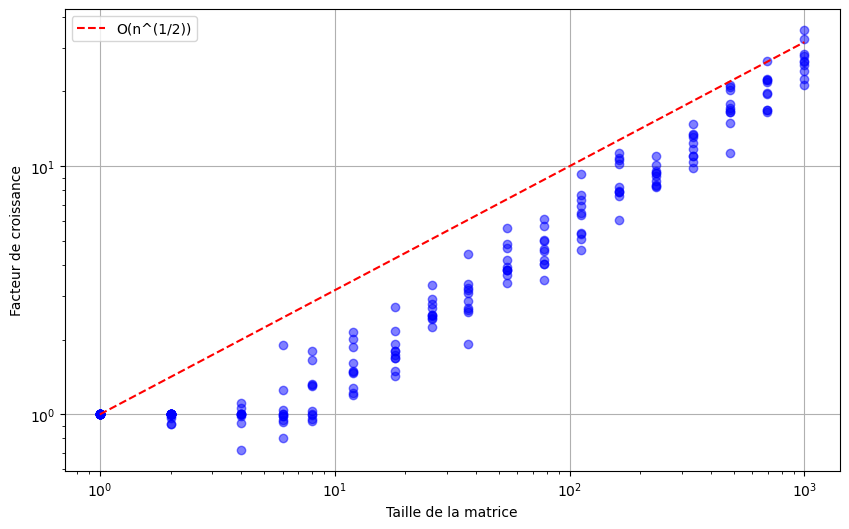

In [60]:
# Paramètres
sizes = np.logspace(0, 3, 20, dtype=int)
nb_matrices = 10
rhos = np.zeros((len(sizes), nb_matrices))

# Boucle sur les tailles
from tqdm import tqdm
for n in tqdm(np.arange(len(sizes))):
    for i in np.arange(nb_matrices):
        A = np.random.rand(sizes[n], sizes[n])
        # VOTRE CODE ICI
        rhos[n, i] = growth_factor(A)

# Affichage de tous les facteurs de croissance, en fonction de la taille
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(sizes, rhos, "bo", alpha=0.5)
plt.plot(sizes, sizes**(1/2), "r--", label="O(n^(1/2))")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Taille de la matrice")
plt.ylabel("Facteur de croissance")
plt.grid()
plt.show()



Que remarquez-vous? Comparez avec le facteur de croissance maximal.

*Votre réponse ici*

On voit que le facteur de croissance croît comme $O(n^{1/2})$, ce qui est beaucoup plus petit que $\rho_{max} = 2^{n-1}$. 

Ainsi, la factorisation LU avec pivot fonctionne très bien pour des matrices aléatoires. 

#### Exercice 1.3.4: Encore plus de matrices aléatoires

Dans l'exercice précédent, nous avons utilisé seulement $10$ matrices aléatoires pour chaque taille de matrice. Le facteur de croissance observé était petit, mais peut-être avons-nous eu de la chance? Regardons alors la densité de probabilité du facteur de croissance.

Le code ci-dessous génère 10'000 matrices aléatoires de taille $8 \times 8$, $16 \times 16$, $32 \times 32$. 

/!\ Avec la fonction `lu_pivot`, le code peut être long à s'exécuter. Si vous avez des problèmes de temps de calcul, vous pouvez utiliser la fonction `scipy.linalg.lu` qui est plus rapide.

Complétez le code de sorte à calculer et stocker le facteur de croissance $\rho$ de chaque matrice. 

100%|██████████| 10000/10000 [00:00<00:00, 12787.15it/s]


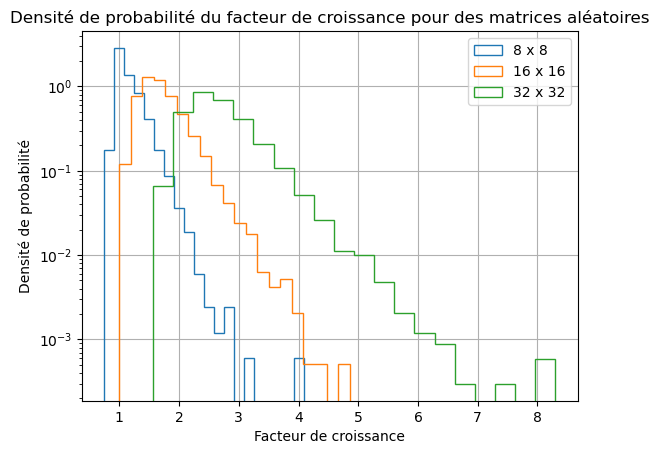

In [61]:
# Génération de matrices aléatoires
from tqdm import tqdm
np.random.seed(1234)
nb = 10000
rho_8 = np.zeros(nb)
rho_16 = np.zeros(nb)
rho_32 = np.zeros(nb)
for i in tqdm(np.arange(nb)):
    A = np.random.rand(8, 8)
    B = np.random.rand(16, 16)
    C = np.random.rand(32, 32)
    # Votre code ici
    rho_8[i] = growth_factor(A)
    rho_16[i] = growth_factor(B)
    rho_32[i] = growth_factor(C)

# Affichage des résultats (densité de probabilité)
import matplotlib.pyplot as plt
plt.hist(rho_8, bins=20, density=True, label="8 x 8", histtype="step")
plt.hist(rho_16, bins=20, density=True, label="16 x 16", histtype="step")
plt.hist(rho_32, bins=20, density=True, label="32 x 32", histtype="step")
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("Facteur de croissance")
plt.ylabel("Densité de probabilité")
plt.title("Densité de probabilité du facteur de croissance pour des matrices aléatoires")
plt.show()



Que peut-on conclure ?

*Votre réponse ici*

La densité de probabilité du facteur de croissance est très concentrée autour de petits facteur de croissance. Cela signifie que la factorisation LU avec pivot est très stable pour des matrices aléatoires.

Cet observation est le résultat de beaucoup d'années de recherche en analyse numérique linéaire. Cependant, la distribution du facteur de croissance n'est pas théoriquement connue. Ce problème est ouvert !

## Exercice 2: Décomposition de Cholesky (optionnel)

Soit $n \in \mathbb N$, et soit $A \in \mathbb R^{n \times n}$ une matrice symétrique définie positive. 

La décomposition de Cholesky de $A$ est donnée par la factorisation $$A = LL^T,$$ où $L$ est une matrice triangulaire inférieure.

---

Implémenter la fonction `Cholesky` qui prend en argument une matrice $A$ et qui renvoie la matrice $L$ telle que $A = LL^T$. 

Testez votre algorithme sur un matrice symétrie définie positive $A$.

Indications: 
- Voir l'algorithme 5.18 du polycopié.
- On peut générer une matrice symétrique définit positive en posant $A = G G^T$ où $G$ est une matrice inversible de taille $n \times n$. 

NB: Les matrices aléatoires de `numpy` sont inversibles avec une probabilité proche de 1.

In [16]:
def Cholesky(A):
    """
    Factorisation de Cholesky de A.

    Entrées
    -------
    A : ndarray
        Matrice symétrique et définie positive de taille n.

    Sorties
    -------
    L : ndarray
        Matrice triangulaire inférieure de taille n.
    """
    # VOTRE CODE ICI
    n = A.shape[0]
    L = np.zeros((n,n))
    for k in np.arange(n):
        L[k,k] = np.sqrt(A[k,k] - np.sum(L[k,:k]**2))
        for i in np.arange(k+1, n):
            L[i,k] = (A[i,k] - np.sum(L[i,:k] * L[k,:k])) / L[k,k]
    return L

In [17]:
# VOTRE TEST ICI
G = np.random.randn(5, 5)
A = G @ G.T
L = Cholesky(A)

print("A = ", A)
print("L @ L.T = ", L @ L.T)


A =  [[ 3.69499531  0.05316012  3.26028714  2.5653839  -0.83925724]
 [ 0.05316012  3.15812779 -1.0028361  -0.08092068 -1.53478455]
 [ 3.26028714 -1.0028361  18.41536771  5.82229471  0.42624673]
 [ 2.5653839  -0.08092068  5.82229471  3.16721624 -0.36952099]
 [-0.83925724 -1.53478455  0.42624673 -0.36952099  1.19097235]]
L @ L.T =  [[ 3.69499531  0.05316012  3.26028714  2.5653839  -0.83925724]
 [ 0.05316012  3.15812779 -1.0028361  -0.08092068 -1.53478455]
 [ 3.26028714 -1.0028361  18.41536771  5.82229471  0.42624673]
 [ 2.5653839  -0.08092068  5.82229471  3.16721624 -0.36952099]
 [-0.83925724 -1.53478455  0.42624673 -0.36952099  1.19097235]]


In [62]:
# Test automatique
for n in np.arange(2, 10):
    np.random.seed(1234)
    A = np.random.rand(n, n)
    A = A @ A.T
    L = Cholesky(A)
    assert np.allclose(A, L @ L.T), "A != L @ L.T"
    L_ref = sp.linalg.cholesky(A, lower=True)
    assert np.allclose(L, L_ref), "L != L_ref"
print("Tests automatiques réussis.")

Tests automatiques réussis.
